# Digit Recognition Model for MNIST Dataset

<img src= "https://aigeekprogrammer.com/wp-content/uploads/2019/08/Handwriting-digit-recognition-Keras-MNIST.jpg"/>

## MNIST dataset:
MNIST is a collection of handwritten digits from 0-9. Image of size 28 X 28

## Introduction
MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels.

In [281]:
import keras

# importing MNIST image data from Keras
from keras.datasets import mnist

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

# data processing
import pandas as pd
import numpy as np

import random

In [282]:
#Splitting the dataset into Train and Test data
digits = mnist.load_data()

#Unpacking 
(X_train, Y_train), (X_test, Y_test) = digits

In [283]:
# shape of the Data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The Keras MINST data 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

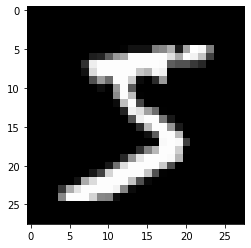

5


In [284]:
# looking at the data 
#First Record
plt.imshow(X_train[0], cmap = 'gray')
plt.show()
print(Y_train[0])

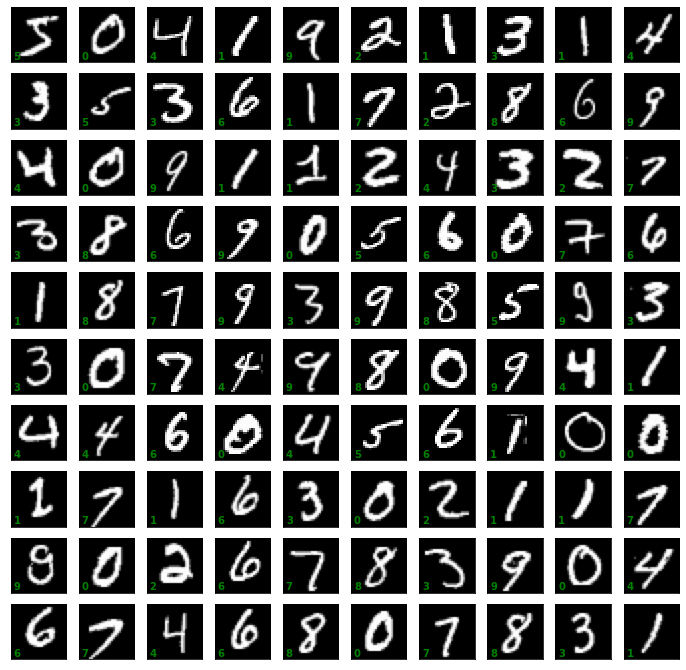

In [285]:
# Vizualizaing top 100 records
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap = 'gray')
    ax.text(0.05, 0.05, str(Y_train[i]), color='green', 
            weight='semibold', transform=ax.transAxes)

In [286]:
X_train[90]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  25, 214, 225,  90,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 145, 212, 253, 253,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 106, 253, 253, 246, 188,  23,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 164, 254, 253, 223, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [287]:
# Normalizing the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [288]:
X_train[90]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Tried running the model without normalization and it does a significant effect if we don't.

## Sequential Model

In [289]:
model = tf.keras.models.Sequential()
#Sequential model is a feed forward model.

# Now adding layers to nn model

################
# INPUT LAYER  # 
################

# we need to flatten the input layer because our data is array of 28x28.
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))  
# 128 = no. of neurons 
# activation - what funtion activates the neuron (sigmoid / relu - rectified linear etc)

################
# HIDDEN LAYER #
################

#  Dense layer:  it's a densely-connected layer,
#  meaning each node connects to each prior and subsequent node. 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))

################
# OUTPUT LAYER #
################

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 
# nodes = 10, 1 node per possible number prediction.
# activation: In this case we use 'softmax' because we need a function that can give us possible 
# probability prediction of out outputs.

####################
# Compiling Model  #
####################

model.compile(optimizer = 'adam' , loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')  
# optimizer:  
# loss: nn doesn't try to improve accuracy, it always try to minimize loss
# sparse_categorical_crossentropy

###############
# Train Model #
###############

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5286 - accuracy: 0.8567
Epoch 2/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.2265 - accuracy: 0.9332
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1686 - accuracy: 0.9500
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1335 - accuracy: 0.9597
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1083 - accuracy: 0.9673
Epoch 6/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.0901 - accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 2s 970us/step - loss: 0.0744 - accuracy: 0.9776
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9804
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss:

#### Check the model accuracy on the test sample

In [290]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

10000/10000 [==============================] - 9s 896us/step - loss: 0.0984 - accuracy: 0.9705
Loss: 9.84%, Accuracy: 97.05%


We tried multiple combination of activation fumction (relu,sigmoid) and optimizer(adam, sgd) , with and without normalizing data.       

- Results on Test Data (with Normalization):

|Combination|Loss|Accuracy|					
|---|---|---|
|sigmoid & sgd  |58.36%|84.38%|	
|<font color='green'>**sigmoid  & adam**</font>|<font color='green'>**9.84%** </font>|<font color='green'>**97.05%**</font>|
|relu & sgd     |18.19%|94.60%|
|relu  & adam   |12.15%|97.10%|

- Results on Test Data (without Normalization)

|Combination|Loss|Accuracy|					
|---|---|---|
|sigmoid & sgd|23.01%|93.34%|
|sigmoid  & adam|21.91%|93.12%|
|relu & sgd|235.17%|11.35%|
|relu  & adam|17.79%|96.36%|

It is clear from the above results that we need activation = sigmoid and optimizer = adam and normalizie data in order to minimize the loss and have higher accuracy.

## Save the Model

In [291]:
outputfile= 'D:/D_ST/Git_Profile/MNIST digits classification/MNIST_Model_OUTPUT.model'
model.save(outputfile)

INFO:tensorflow:Assets written to: D:/D_ST/Git_Profile/MNIST digits classification/MNIST_Model_OUTPUT.model\assets


## Load The Model

In [292]:
from tensorflow.keras.models import load_model
final_model = load_model(outputfile)
final_model.summary()
final_model.optimizer

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_79 (Dense)            (None, 128)               100480    
                                                                 
 dense_80 (Dense)            (None, 128)               16512     
                                                                 
 dense_81 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [293]:
predictions = final_model.predict(X_test)
predictions

array([[6.73123921e-08, 5.93021412e-07, 1.03650646e-05, ...,
        9.99756157e-01, 2.04212256e-07, 5.25297196e-07],
       [9.01198973e-08, 1.44047732e-03, 9.98529673e-01, ...,
        5.65641528e-07, 3.41588930e-07, 3.45726003e-10],
       [9.88685489e-09, 9.99809802e-01, 2.35815514e-05, ...,
        1.61919452e-05, 4.69220286e-05, 4.38536233e-07],
       ...,
       [1.22425092e-08, 4.42432537e-07, 2.63422208e-07, ...,
        3.75677655e-06, 3.95848874e-05, 2.03001997e-04],
       [1.45739276e-09, 1.25259106e-07, 3.39623135e-10, ...,
        1.55690530e-10, 2.88860920e-05, 1.05934745e-08],
       [1.29763794e-06, 5.85688326e-07, 6.54305381e-07, ...,
        9.93467086e-10, 1.13263880e-07, 5.09198506e-09]], dtype=float32)

Let's check Actual Value and Predicted Value for our test data set

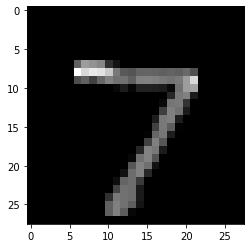

In [294]:
# Original Values
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [295]:
# Predicted Value
print(np.argmax(predictions[0]))

7


## Vizualizing the Predictions

In [296]:
preds_raw = model.predict(X_test)

# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in model.predict(X_test)]

# view the first ten predictions
preds[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

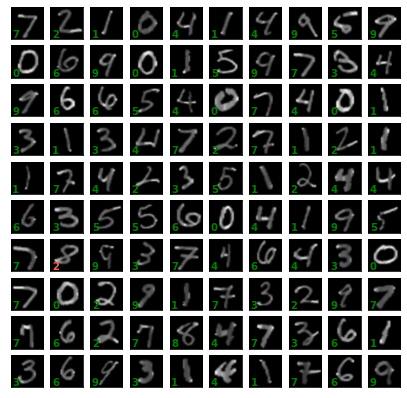

In [297]:
# Visualizinf forat 100 values
fig, axes = plt.subplots(10, 10, figsize=(7, 7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = Y_test[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

We can observe that our model has predicted ONE value wrong for the first 100 images